In [ ]:
import pandas as pd
df_price = pd.read_csv("price.csv", encoding='EUC-KR')

In [ ]:
df_price.tail()

ÏùºÏûê     Ï¢ÖÍ∞Ä    ÎåÄÎπÑ   Îì±ÎùΩÎ•†     ÏãúÍ∞Ä     Í≥†Í∞Ä     Ï†ÄÍ∞Ä       Í±∞ÎûòÎüâ  \
524  2025-02-26  56600  -600 -1.05  57000  57100  56100  18117091   
525  2025-02-27  56300  -300 -0.53  56500  57100  56200  14975356   
526  2025-02-28  54500 -1800 -3.20  55400  55700  54500  28036698   
527  2025-03-04  54500     0  0.00  53900  55000  53800  18553933   
528  2025-03-05  54000  -500 -0.92  55100  55400  54000  16578817   

             Í±∞ÎûòÎåÄÍ∏à          ÏãúÍ∞ÄÏ¥ùÏï°       ÏÉÅÏû•Ï£ºÏãùÏàò  
524  1.024930e+12  3.378900e+14  5969782550  
525  8.465310e+11  3.360990e+14  5969782550  
526  1.540210e+12  3.253530e+14  5969782550  
527  1.010210e+12  3.253530e+14  5969782550  
528  9.026220e+11  3.223680e+14  5969782550

In [ ]:
import pandas as pd

# ÌïÑÏöîÌïú Ïó¥Îßå ÏÑ†ÌÉù
timeSeries = df_price.loc[:, ["ÏùºÏûê", "Ï¢ÖÍ∞Ä"]]

# 'ÏùºÏûê' Ïª¨ÎüºÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
timeSeries["ÏùºÏûê"] = pd.to_datetime(timeSeries["ÏùºÏûê"])

# 'ÏùºÏûê' Ïª¨ÎüºÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ï
timeSeries.set_index("ÏùºÏûê", inplace=True)

In [ ]:
# ADF Test
# Í∑ÄÎ¨¥Í∞ÄÏÑ§: ÏãúÍ≥ÑÏó¥ ÏûêÎ£åÍ∞Ä Ï†ïÏÉÅ ÏãúÍ≥ÑÏó¥Ïù¥ ÏïÑÎãàÎã§. (ÎπÑÏ†ïÏÉÅ)
# ÎåÄÎ¶ΩÍ∞ÄÏÑ§: ÏãúÍ≥ÑÏó¥ ÏûêÎ£åÍ∞Ä Ï†ïÏÉÅ ÏãúÍ≥ÑÏó¥Ïù¥Îã§.

In [ ]:
# adfuller library
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt

# Check adfuller
def check_adfuller(ts):
  # Dickey-Fuller test
  result = adfuller(ts, autolag='AIC')
  print("Test statistic: ", result[0])
  print("p-value: ", result[1])
  print("Critical Values:", result[4])

# Check mean & std
def check_mean_std(ts):
  # Rolling statistics
  rolmean = ts.rolling(6).mean()
  rolstd = ts.rolling(6).std()

  plt.figure(figsize=(22, 10))
  orig = plt.plot(ts, color='red', label='Original')
  mean = plt.plot(rolmean, color='black', label='Rolling Mean')
  std = plt.plot(rolstd, color='green', label =' Rolling Std')
  plt.xlabel("Date")
  plt.ylabel("Mean Temperature")
  plt.title('Rolling Mean & Standard Deviation')
  plt.legend()
  plt.show()

In [ ]:
check_adfuller(timeSeries)

Test statistic:  -1.2694390832491746
p-value:  0.6430354506098983
Critical Values: {'1%': -3.442843345332837, '5%': -2.867050445147657, '10%': -2.5697048674984457}


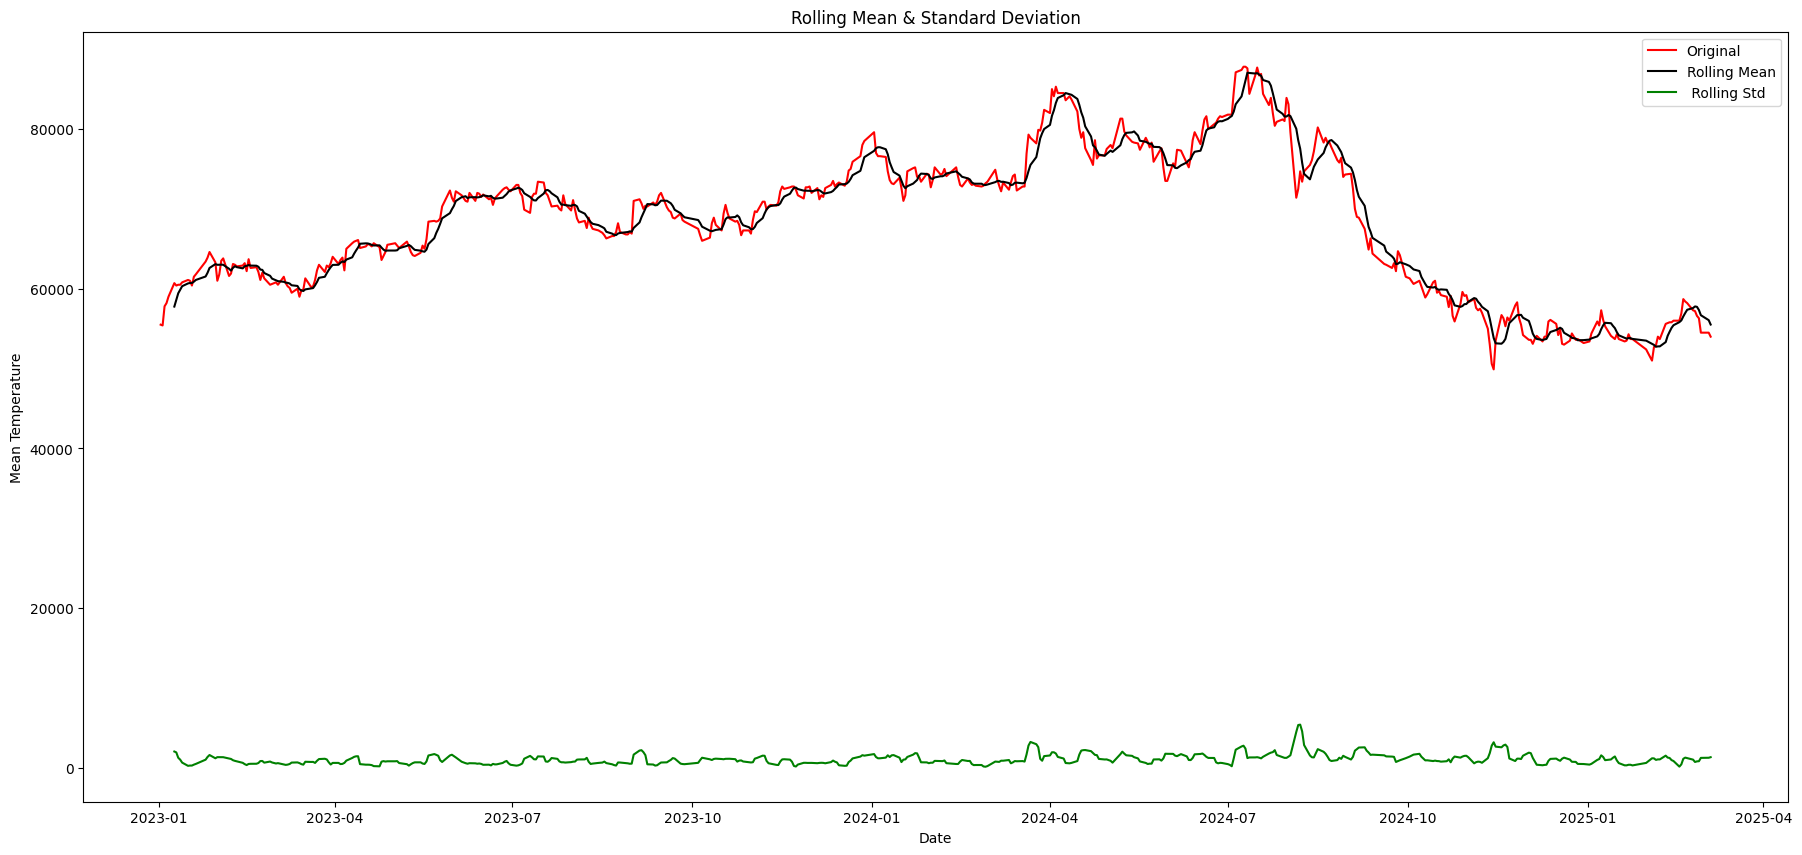

In [ ]:
check_mean_std(timeSeries)

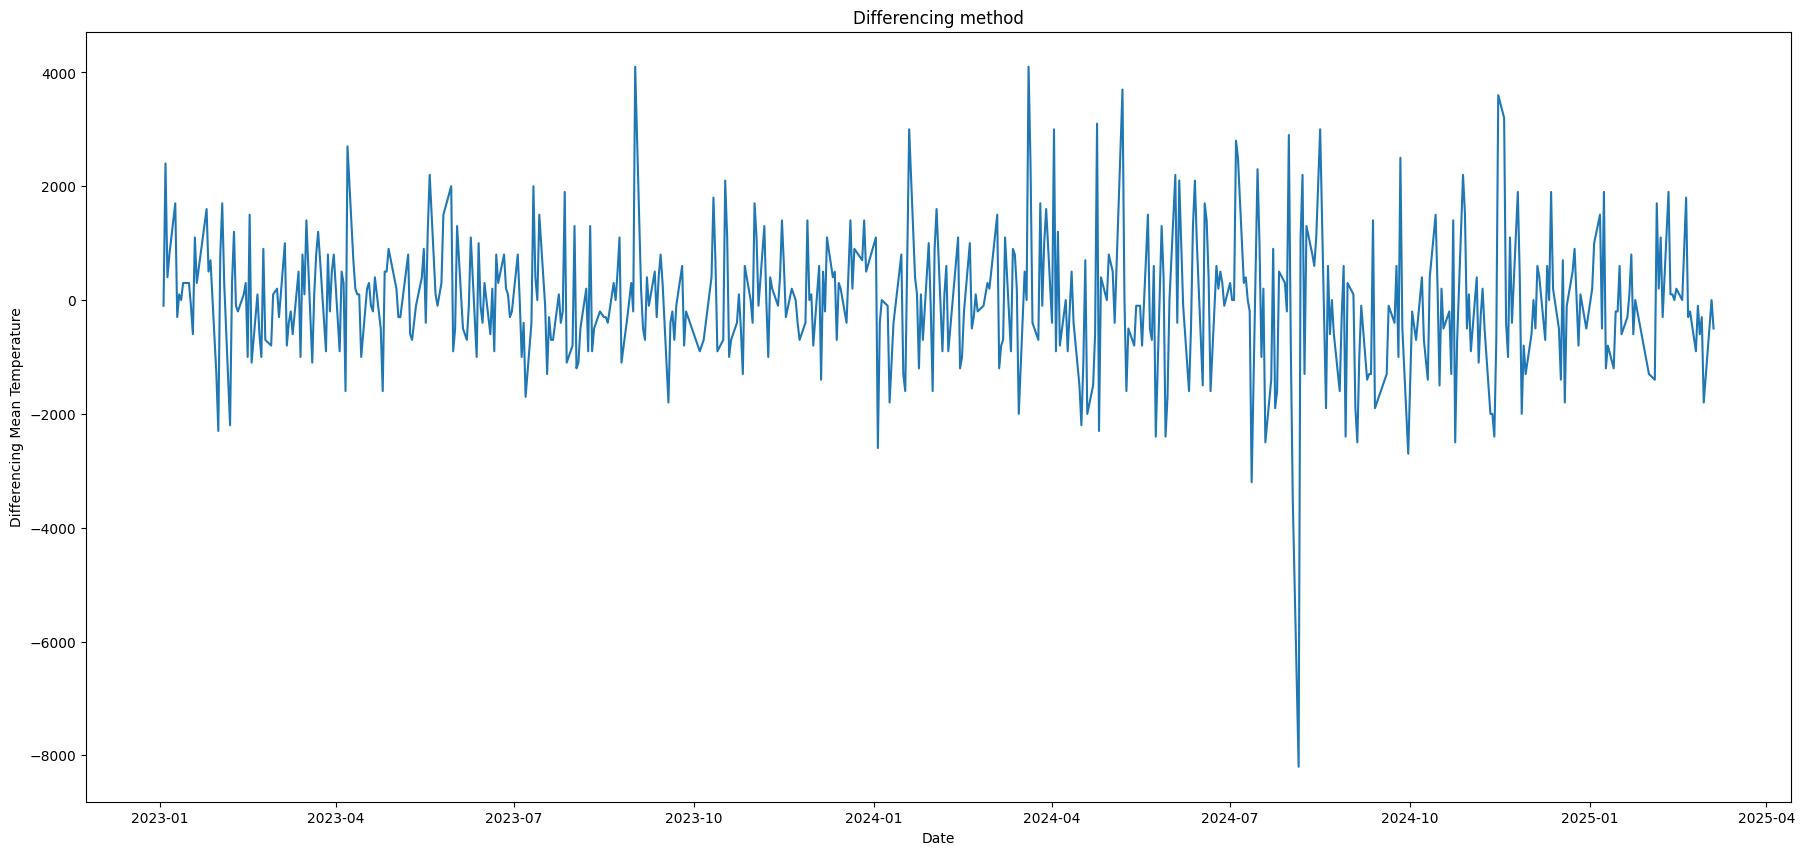

In [ ]:
# differencing method
timeSeries_diff = timeSeries - timeSeries.shift()
plt.figure(figsize=(22, 10))
plt.plot(timeSeries_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

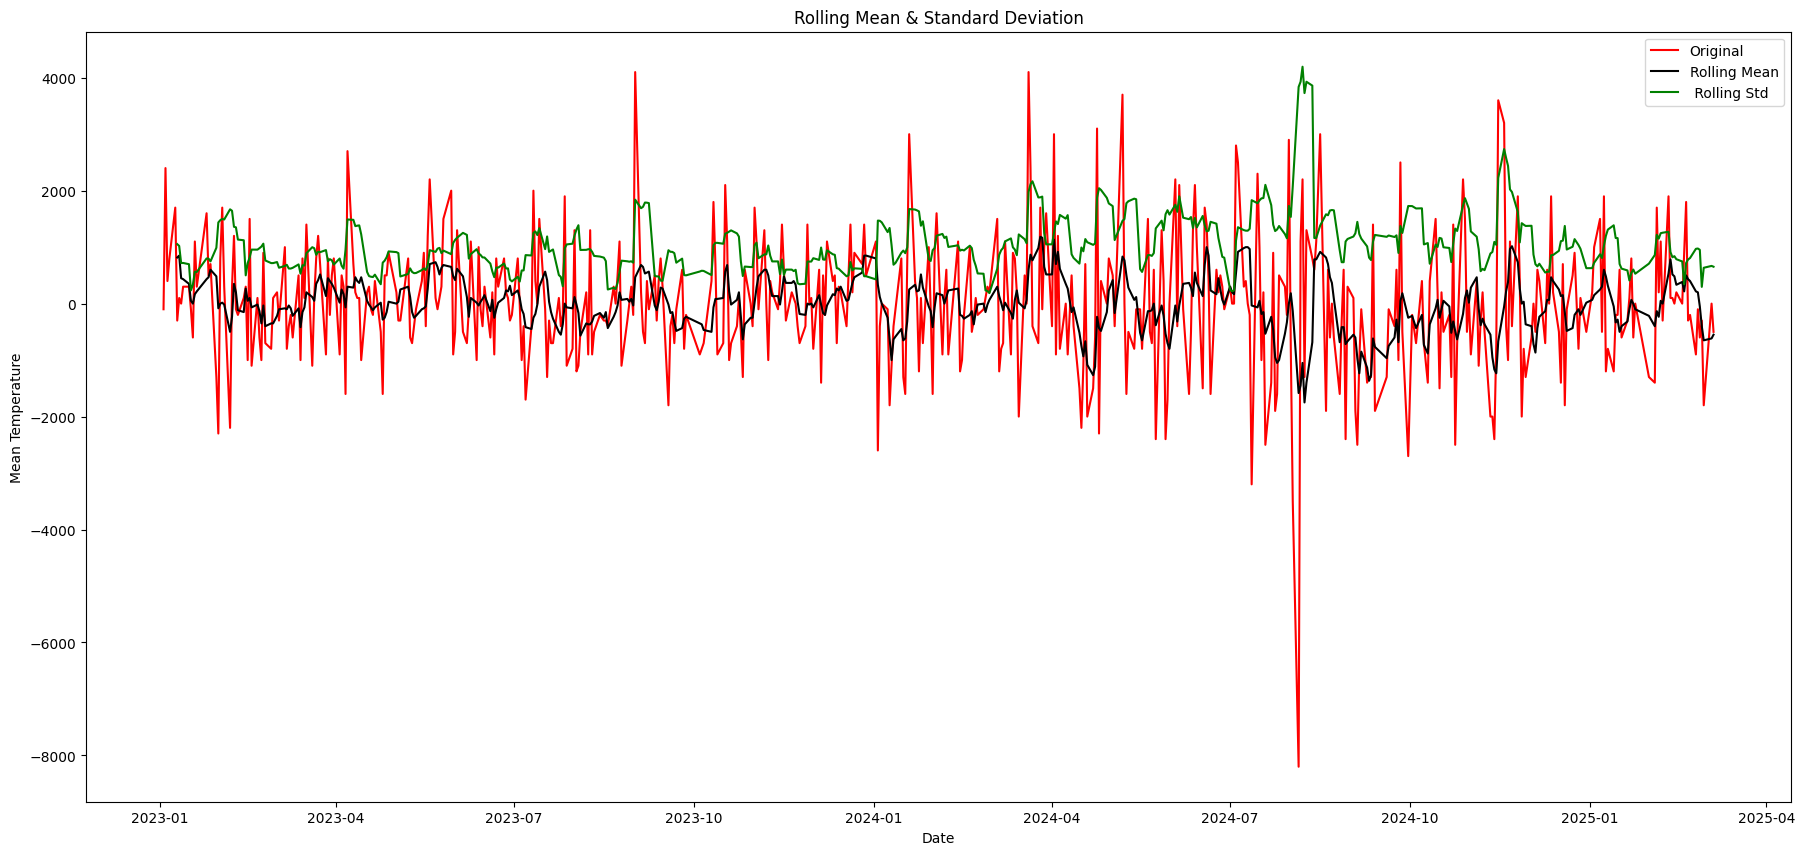

Test statistic:  -17.44949283232199
p-value:  4.661287737056011e-30
Critical Values: {'1%': -3.442843345332837, '5%': -2.867050445147657, '10%': -2.5697048674984457}


In [ ]:
timeSeries_diff.dropna(inplace=True)
check_mean_std(timeSeries_diff)
check_adfuller(timeSeries_diff)

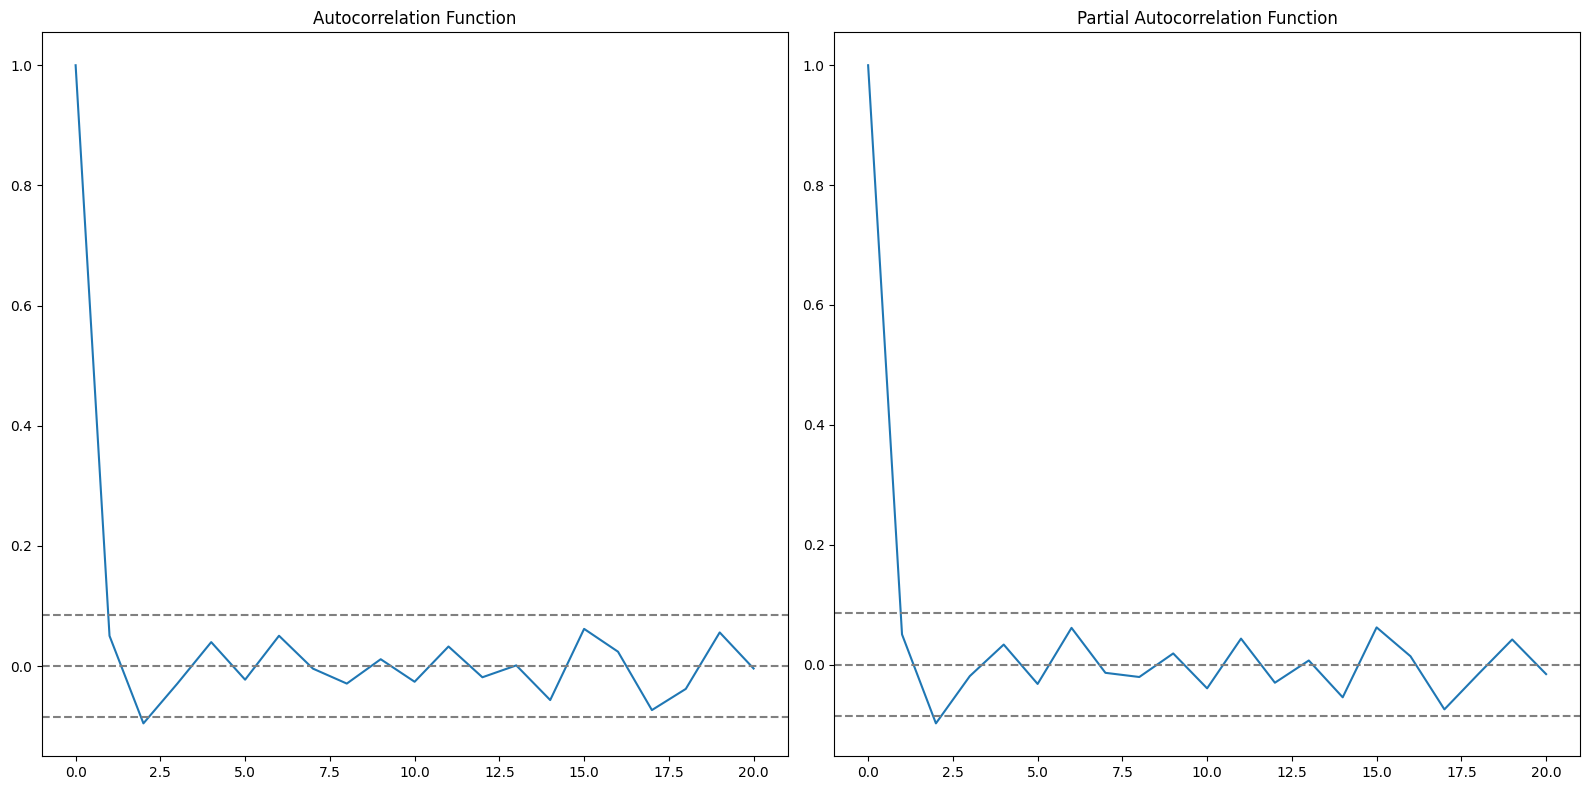

In [ ]:
# ACF and PACF
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
lag_acf = acf(timeSeries_diff, nlags=20)
lag_pacf = pacf(timeSeries_diff, nlags=20, method='ols')
#ACF
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(timeSeries_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(timeSeries_diff)),linestyle='--', color='gray')
plt.title("Autocorrelation Function")

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(timeSeries_diff)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(timeSeries_diff)),linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Mean Squared Error: 2727463.3209563997
Mean Absolute Error (MAE): 1236.6877080097672


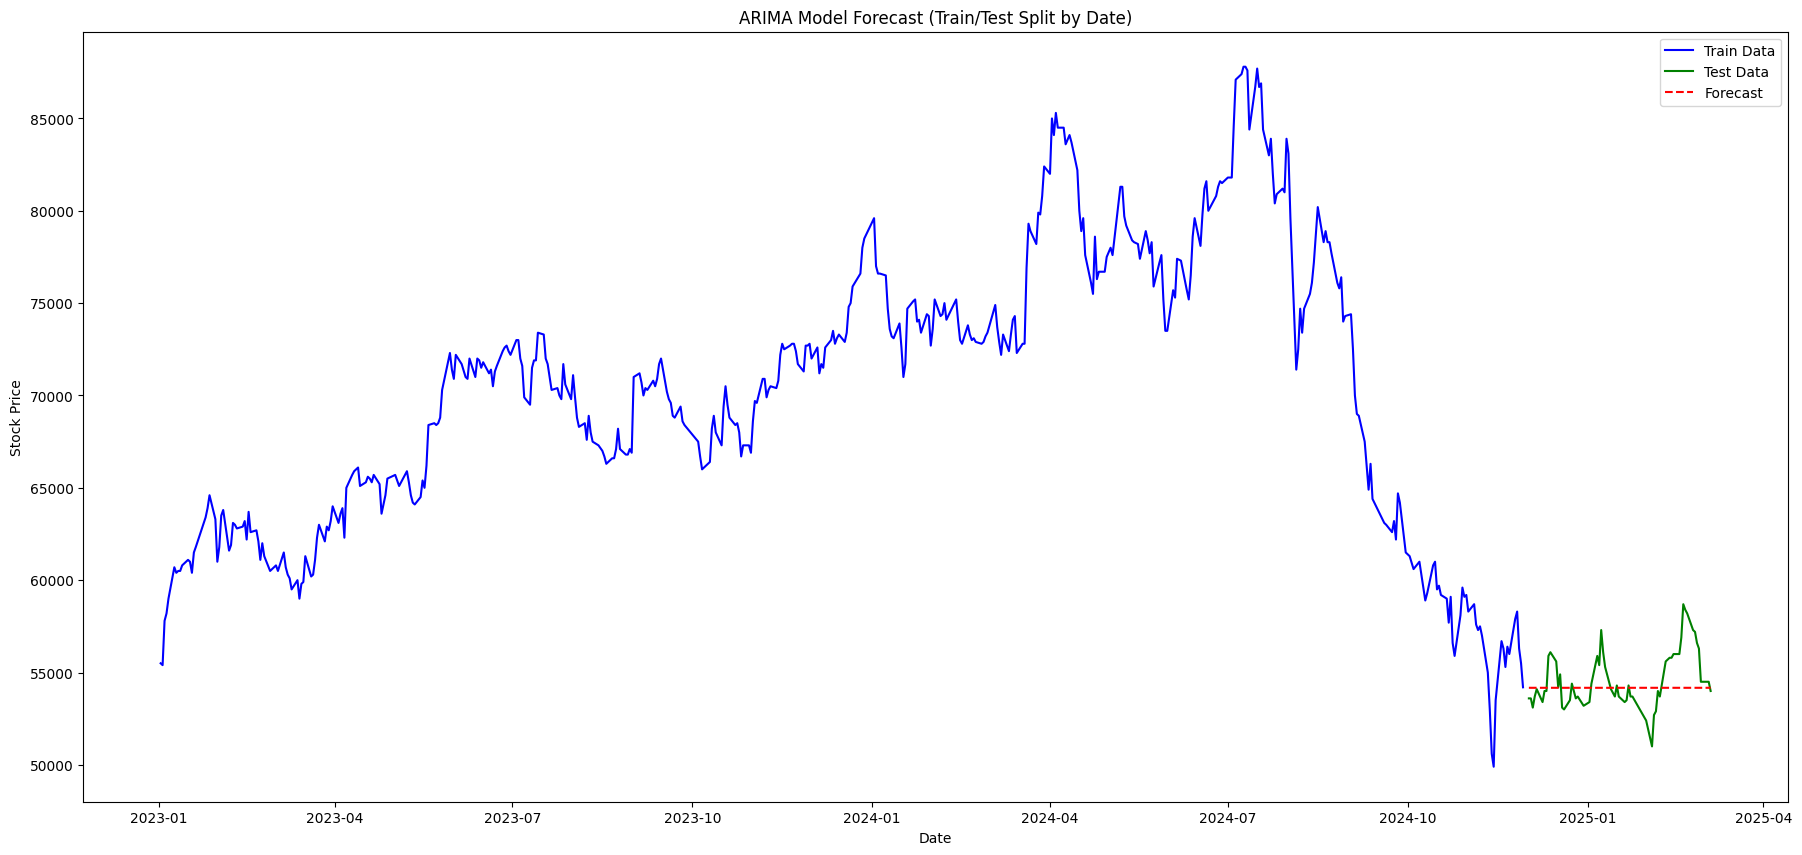

In [ ]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÎÇòÎàÑÍ∏∞ (ÎÇ†Ïßú Í∏∞Î∞ò)
train = timeSeries.loc[:'2024-11-29']
test = timeSeries[timeSeries.index > "2024-11-29"]

# ARIMA Î™®Îç∏ ÌïôÏäµ (Ï∞®Î∂Ñ Ìè¨Ìï®)
model = ARIMA(train["Ï¢ÖÍ∞Ä"], order=(1,1,1))
model_fit = model.fit()

# ÏòàÏ∏° ÏàòÌñâ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ïù¥ÌõÑÏùò Í∏∞Í∞Ñ)
forecast = model_fit.forecast(steps=len(test))

# ÏòàÏ∏°Í∞íÏùò Ïù∏Îç±Ïä§Î•º ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÎÇ†ÏßúÎ°ú ÎßûÏ∂îÍ∏∞
forecast.index = test.index

# ÏÑ±Îä• ÌèâÍ∞Ä (MSE, MAE)
mse = mean_squared_error(test["Ï¢ÖÍ∞Ä"], forecast)
mae = mean_absolute_error(test["Ï¢ÖÍ∞Ä"], forecast)

print("Mean Squared Error:", mse)
print("Mean Absolute Error (MAE):", mae)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(22, 10))
plt.plot(train, label='Train Data', color='blue')
plt.plot(test, label='Test Data', color='green')
plt.plot(forecast, label='Forecast', linestyle='--', color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("ARIMA Model Forecast (Train/Test Split by Date)")
plt.legend()
plt.show()

In [ ]:
"""
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ARIMA Î™®Îç∏ ÌïôÏäµ
model = ARIMA(timeSeries, order=(2,1,2))  # (p,d,q) Í∞í Í∏∞Î≥∏ ÏÑ§Ï†ï
model_fit = model.fit()

# ÏòàÏ∏°Ìï† ÎÇ†Ïßú Î≤îÏúÑ ÏÑ§Ï†ï
start_date = "2024-12-01"  # 2024-12-01(ÏùºÏöîÏùº) Ï†úÏô∏ÌïòÍ≥† 12-02(Ïõî)Î∂ÄÌÑ∞ ÏòàÏ∏° ÏãúÏûë
end_date = "2025-03-02"

# ‚úÖ `timeSeries.index`ÏóêÏÑú Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî ÎÇ†ÏßúÎßå ÌïÑÌÑ∞ÎßÅ (Í≥µÌú¥Ïùº Î∞è Ï£ºÎßê Ï†úÏô∏)
valid_dates = timeSeries.loc[start_date:end_date].index  # Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï°¥Ïû¨ÌïòÎäî ÎÇ†ÏßúÎßå Í∞ÄÏ†∏Ïò§Í∏∞

# ÏòàÏ∏°ÏùÑ ÏúÑÌïú ÏãúÏûë/Ï¢ÖÎ£å Ïù∏Îç±Ïä§ ÏÑ§Ï†ï
start_index = timeSeries.index.get_loc(valid_dates[0])  # ÏòàÏ∏° ÏãúÏûë Ïù∏Îç±Ïä§
end_index = timeSeries.index.get_loc(valid_dates[-1])  # ÏòàÏ∏° Ï¢ÖÎ£å Ïù∏Îç±Ïä§

# ÏòàÏ∏° ÏàòÌñâ
forecast = model_fit.predict(start=start_index, end=end_index)

# ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµêÌïòÏó¨ MSE Í≥ÑÏÇ∞
actual_values = timeSeries.loc[valid_dates]  # Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî ÎÇ†ÏßúÏùò Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
error = mean_squared_error(actual_values, forecast)
print("Mean Squared Error:", error)

# ‚úÖ MAE (Mean Absolute Error) Í≥ÑÏÇ∞
mae = mean_absolute_error(actual_values, forecast)
print("Mean Absolute Error (MAE):", mae)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(22, 10))
plt.plot(timeSeries, label='Original')  # Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥ Í∑∏ÎûòÌîÑ
plt.plot(valid_dates, forecast, label='Predicted', linestyle="dashed", color='red')  # ÏòàÏ∏°Í∞í
plt.title("Time Series Forecast (Matching Existing Dates)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()
"""

'\n# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞\nfrom statsmodels.tsa.arima.model import ARIMA\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error\n\n# ARIMA Î™®Îç∏ ÌïôÏäµ\nmodel = ARIMA(timeSeries, order=(2,1,2))  # (p,d,q) Í∞í Í∏∞Î≥∏ ÏÑ§Ï†ï\nmodel_fit = model.fit()\n\n# ÏòàÏ∏°Ìï† ÎÇ†Ïßú Î≤îÏúÑ ÏÑ§Ï†ï\nstart_date = "2024-12-01"  # 2024-12-01(ÏùºÏöîÏùº) Ï†úÏô∏ÌïòÍ≥† 12-02(Ïõî)Î∂ÄÌÑ∞ ÏòàÏ∏° ÏãúÏûë\nend_date = "2025-03-02"\n\n# ‚úÖ `timeSeries.index`ÏóêÏÑú Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî ÎÇ†ÏßúÎßå ÌïÑÌÑ∞ÎßÅ (Í≥µÌú¥Ïùº Î∞è Ï£ºÎßê Ï†úÏô∏)\nvalid_dates = timeSeries.loc[start_date:end_date].index  # Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï°¥Ïû¨ÌïòÎäî ÎÇ†ÏßúÎßå Í∞ÄÏ†∏Ïò§Í∏∞\n\n# ÏòàÏ∏°ÏùÑ ÏúÑÌïú ÏãúÏûë/Ï¢ÖÎ£å Ïù∏Îç±Ïä§ ÏÑ§Ï†ï\nstart_index = timeSeries.index.get_loc(valid_dates[0])  # ÏòàÏ∏° ÏãúÏûë Ïù∏Îç±Ïä§\nend_index = timeSeries.index.get_loc(valid_dates[-1])  # ÏòàÏ∏° Ï¢ÖÎ£å Ïù∏Îç±Ïä§\n\n# ÏòàÏ∏° ÏàòÌñâ\nforecast = model_fit.predict(start=start_index,

## seasonal and trend decomposition using loess

In [ ]:
import pandas as pd
df_price = pd.read_csv("price.csv", encoding='EUC-KR')

In [ ]:
len(df_price)

529

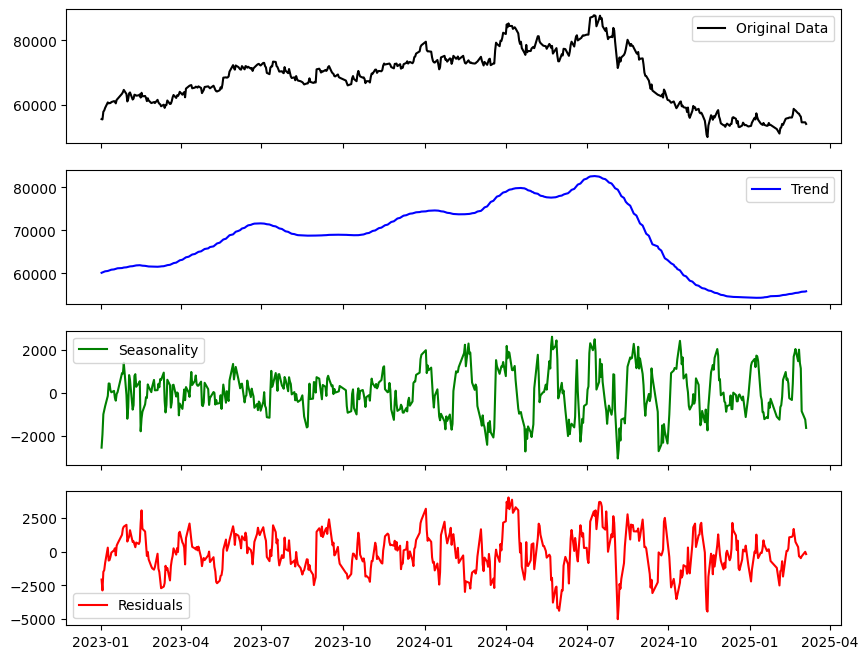

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# ÎÇ†Ïßú Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
df_price['ÏùºÏûê'] = pd.to_datetime(df_price['ÏùºÏûê'])

# ÎÇ†ÏßúÎ•º Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ï
df_price.set_index('ÏùºÏûê', inplace=True)

# STL Î∂ÑÌï¥ ÏàòÌñâ (Í∏∞Í∞ÑÏùÑ 30ÏùºÎ°ú ÏÑ§Ï†ï)
stl = STL(df_price['Ï¢ÖÍ∞Ä'], period=30)
result = stl.fit()

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

axes[0].plot(df_price['Ï¢ÖÍ∞Ä'], label="Original Data", color="black")
axes[0].legend()

axes[1].plot(result.trend, label="Trend", color="blue")
axes[1].legend()

axes[2].plot(result.seasonal, label="Seasonality", color="green")
axes[2].legend()

axes[3].plot(result.resid, label="Residuals", color="red")
axes[3].legend()

plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

MSE: 215389.18
MAE: 341.56


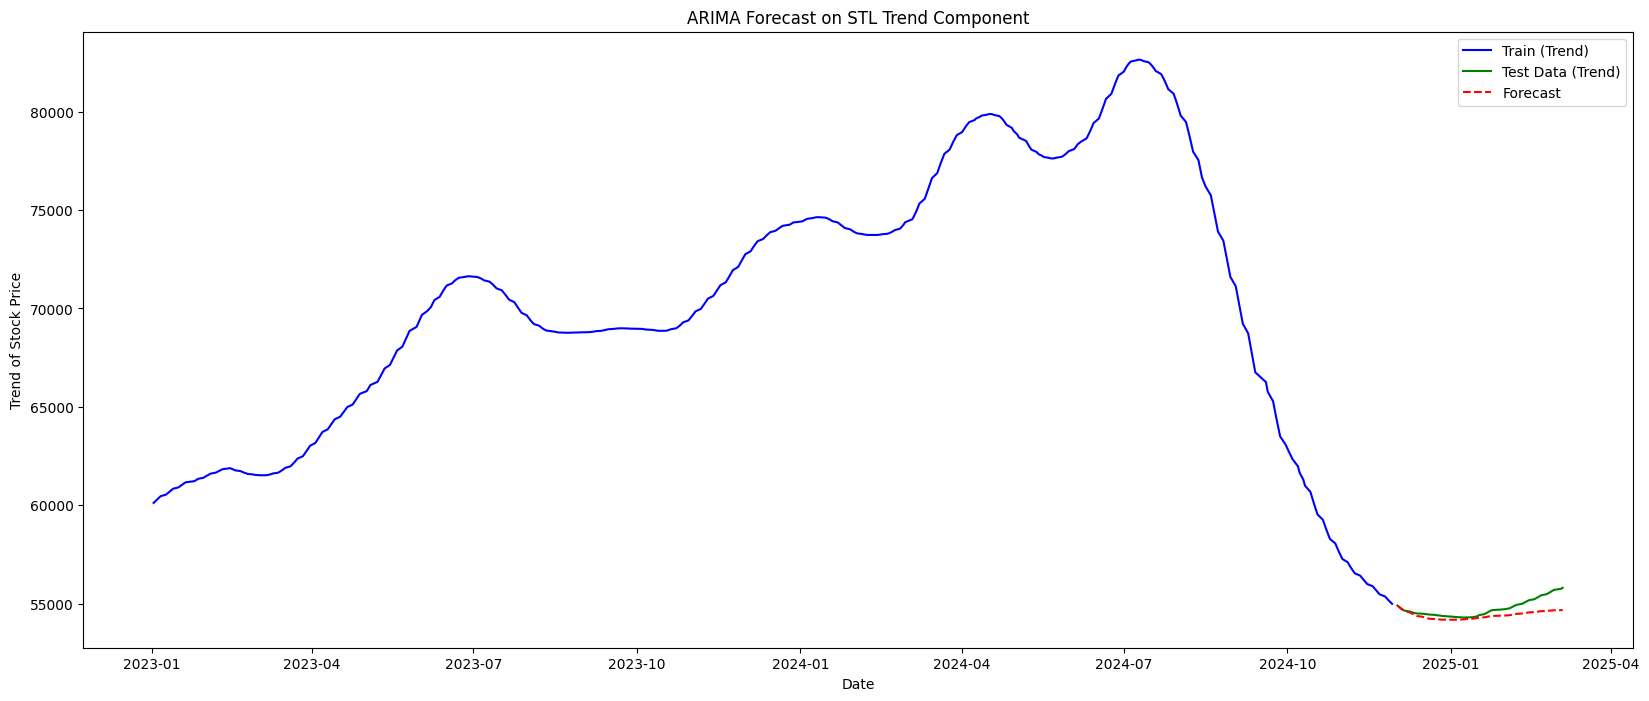

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# STL Ï∂îÏÑ∏ÏÑ±Î∂ÑÏóêÏÑú Í≤∞Ï∏°Ïπò Ï†úÍ±∞
stl_trend = result.trend.dropna()

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞(2024-11-29ÍπåÏßÄ), ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(Ïù¥ÌõÑ)Î°ú Î™ÖÏãúÏ†Å Î∂ÑÎ¶¨
train_trend = stl_trend[stl_trend.index <= '2024-11-29']
test_trend = stl_trend[stl_trend.index > '2024-11-29']

# ARIMA Î™®Îç∏ ÌïôÏäµ (Ï∂îÏÑ∏ ÏÑ±Î∂Ñ Í∏∞Î∞ò)
model = ARIMA(train_trend, order=(2,1,2))
model_fit = model.fit()

# ÏòàÏ∏° ÏàòÌñâ (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í∏∏Ïù¥ÎßåÌÅº)
forecast = model_fit.forecast(steps=len(test_trend))

# forecast Í≤∞Í≥ºÏùò indexÎ•º test Îç∞Ïù¥ÌÑ∞Ïùò indexÎ°ú ÏßÄÏ†ï
forecast.index = test_trend.index

# ÏÑ±Îä• ÌèâÍ∞Ä
mse = mean_squared_error(test_trend, forecast)
mae = mean_absolute_error(test_trend, forecast)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(20,8))
plt.plot(train_trend, label='Train (Trend)', color='blue')
plt.plot(test_trend, label='Test Data (Trend)', color='green')
plt.plot(forecast, label='Forecast', linestyle='--', color='red')
plt.title("ARIMA Forecast on STL Trend Component")
plt.xlabel("Date")
plt.ylabel("Trend of Stock Price")
plt.legend()
plt.show()

In [ ]:
stl_trend

ÏùºÏûê
2023-01-02    60117.454256
2023-01-03    60206.396378
2023-01-04    60293.132138
2023-01-05    60377.619006
2023-01-06    60459.841155
                  ...     
2025-02-26    55586.869614
2025-02-27    55641.294617
2025-02-28    55696.179451
2025-03-04    55751.480883
2025-03-05    55807.162628
Name: trend, Length: 529, dtype: float64

## seasonal and trend decomposition using loess -- Î∂ÄÌä∏Ïä§Ìä∏Îû©

In [ ]:
import pandas as pd
df_price = pd.read_csv("price.csv", encoding='EUC-KR')

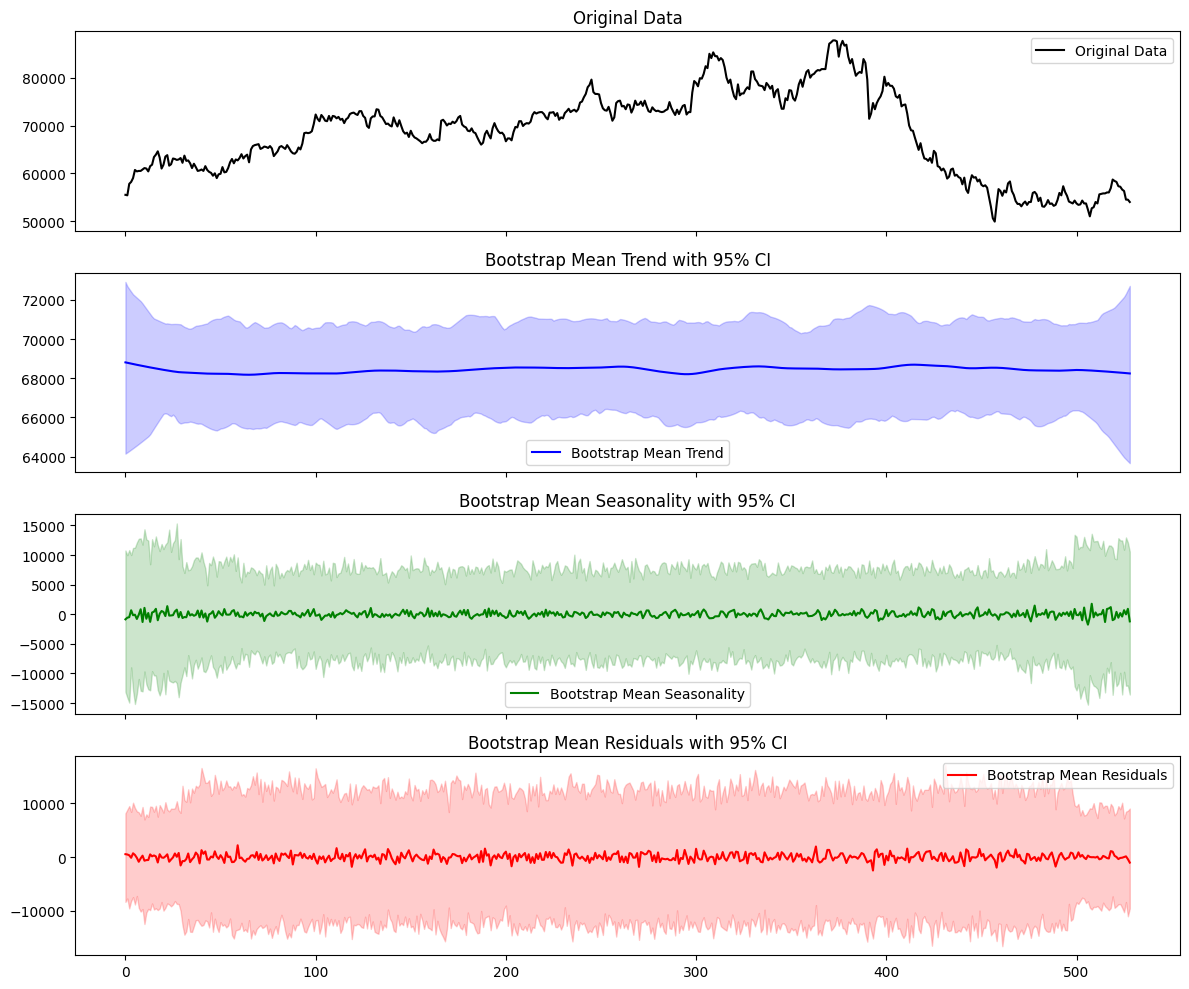

In [ ]:
import numpy as np
from statsmodels.tsa.seasonal import STL

# Bootstrap ÏÑ§Ï†ï
n_bootstrap = 100  # Î∂ÄÌä∏Ïä§Ìä∏Îû© ÏÉòÌîå Í∞úÏàò

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Í∏∏Ïù¥
n = len(df_price['Ï¢ÖÍ∞Ä'])

# STL Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î∞∞Ïó¥ Ï¥àÍ∏∞Ìôî
bootstrap_trends = np.zeros((n, n_bootstrap))
bootstrap_seasonals = np.zeros((n, n_bootstrap))
bootstrap_residuals = np.zeros((n, n_bootstrap))

# BootstrapÏùÑ ÌÜµÌï¥ Ïó¨Îü¨ Î≤à STL Î∂ÑÌï¥ ÏàòÌñâ
for i in range(n_bootstrap):
    sample = df_price['Ï¢ÖÍ∞Ä'].sample(n=n, replace=True, random_state=i)  # Î∂ÄÌä∏Ïä§Ìä∏Îû© ÏÉòÌîåÎßÅ
    sample.index = df_price.index  # ÏõêÎ≥∏ Ïù∏Îç±Ïä§ Ïú†ÏßÄ

    # STL Î∂ÑÌï¥ Ï†ÅÏö© (30Ïùº Ï£ºÍ∏∞)
    stl_sample = STL(sample, period=30).fit()

    # Í≤∞Í≥º Ï†ÄÏû•
    bootstrap_trends[:, i] = stl_sample.trend
    bootstrap_seasonals[:, i] = stl_sample.seasonal
    bootstrap_residuals[:, i] = stl_sample.resid

# Bootstrap Í≤∞Í≥ºÏùò ÌèâÍ∑† Î∞è Ïã†Î¢∞ Íµ¨Í∞Ñ(95% Ïã†Î¢∞Íµ¨Í∞Ñ) Í≥ÑÏÇ∞
mean_trend = np.mean(bootstrap_trends, axis=1)
mean_seasonal = np.mean(bootstrap_seasonals, axis=1)
mean_residual = np.mean(bootstrap_residuals, axis=1)

lower_trend = np.percentile(bootstrap_trends, 2.5, axis=1)
upper_trend = np.percentile(bootstrap_trends, 97.5, axis=1)

lower_seasonal = np.percentile(bootstrap_seasonals, 2.5, axis=1)
upper_seasonal = np.percentile(bootstrap_seasonals, 97.5, axis=1)

lower_residual = np.percentile(bootstrap_residuals, 2.5, axis=1)
upper_residual = np.percentile(bootstrap_residuals, 97.5, axis=1)

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞
axes[0].plot(df_price.index, df_price['Ï¢ÖÍ∞Ä'], label="Original Data", color="black")
axes[0].set_title("Original Data")
axes[0].legend()

# Trend Component (Bootstrap ÌèâÍ∑† Î∞è Ïã†Î¢∞ Íµ¨Í∞Ñ)
axes[1].plot(df_price.index, mean_trend, label="Bootstrap Mean Trend", color="blue")
axes[1].fill_between(df_price.index, lower_trend, upper_trend, color='blue', alpha=0.2)
axes[1].set_title("Bootstrap Mean Trend with 95% CI")
axes[1].legend()

# Seasonal Component (Bootstrap ÌèâÍ∑† Î∞è Ïã†Î¢∞ Íµ¨Í∞Ñ)
axes[2].plot(df_price.index, mean_seasonal, label="Bootstrap Mean Seasonality", color="green")
axes[2].fill_between(df_price.index, lower_seasonal, upper_seasonal, color='green', alpha=0.2)
axes[2].set_title("Bootstrap Mean Seasonality with 95% CI")
axes[2].legend()

# Residual Component (Bootstrap ÌèâÍ∑† Î∞è Ïã†Î¢∞ Íµ¨Í∞Ñ)
axes[3].plot(df_price.index, mean_residual, label="Bootstrap Mean Residuals", color="red")
axes[3].fill_between(df_price.index, lower_residual, upper_residual, color='red', alpha=0.2)
axes[3].set_title("Bootstrap Mean Residuals with 95% CI")
axes[3].legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Mean Squared Error (MSE): 3167.5892369056487
Mean Absolute Error (MAE): 37.0942744962158


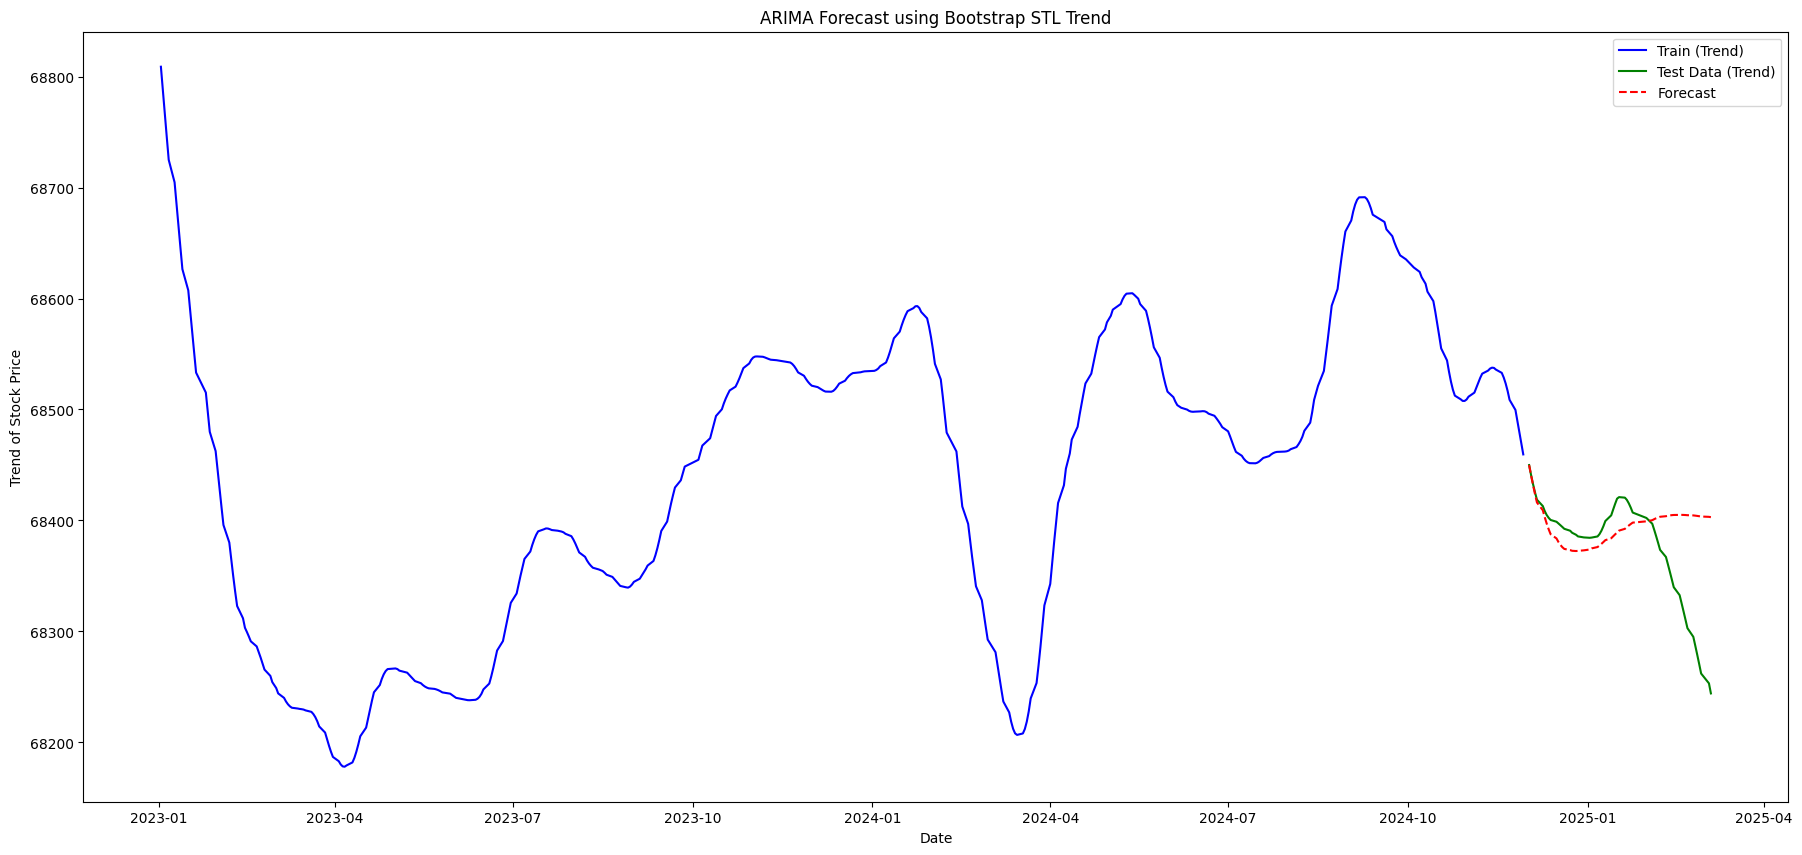

In [ ]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# ÎÇ†Ïßú Î≥ÄÌôò Î∞è Ïù∏Îç±Ïä§ ÏÑ§Ï†ï
df_price['ÏùºÏûê'] = pd.to_datetime(df_price['ÏùºÏûê'])
df_price.set_index('ÏùºÏûê', inplace=True)

# STL Î∂ÑÌï¥ ÌõÑ bootstrap
n_bootstrap = 100
n = len(df_price)

bootstrap_trends = np.zeros((n, n_bootstrap))

# Bootstrap ÏÉòÌîåÎßÅÏùÑ ÌÜµÌïú STL Î∂ÑÌï¥
for i in range(n_bootstrap):
    sample = df_price['Ï¢ÖÍ∞Ä'].sample(n=n, replace=True, random_state=i)
    sample.index = df_price.index

    stl = STL(sample, period=30)
    result = stl.fit()

    bootstrap_trends[:, i] = result.trend

# Ï∂îÏÑ∏(trend) ÏÑ±Î∂ÑÏùò ÌèâÍ∑† Í≥ÑÏÇ∞
mean_trend = np.mean(bootstrap_trends, axis=1)

# ÎÇ†Ïßú Ïù∏Îç±Ïä§ÏôÄ Ìï®Íªò trend Series ÏÉùÏÑ±
bootstrap_trend_series = pd.Series(mean_trend, index=df_price.index).dropna()

# ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÎÇòÎàÑÍ∏∞
train = bootstrap_trend_series[:'2024-11-29']
test = bootstrap_trend_series['2024-11-30':]

# ARIMA Î™®Îç∏ ÌïôÏäµ
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()

# ÏòàÏ∏° ÏàòÌñâ (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ)
forecast = model_fit.forecast(steps=len(test))

# ÏòàÏ∏°Í∞í Ïù∏Îç±Ïä§ ÏÑ§Ï†ï
forecast.index = test.index

# ÏÑ±Îä• ÌèâÍ∞Ä
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(22, 10))
plt.plot(train, label='Train (Trend)', color='blue')
plt.plot(test, label='Test Data (Trend)', color='green')
plt.plot(forecast, label='Forecast', linestyle='--', color='red')
plt.xlabel("Date")
plt.ylabel("Trend of Stock Price")
plt.title("ARIMA Forecast using Bootstrap STL Trend")
plt.legend()
plt.show()

## Transformer - ÏõêÎ≥∏

Epoch 1/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 45ms/step - loss: 0.7436 - val_loss: 0.0696
Epoch 2/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step - loss: 0.1064 - val_loss: 0.0852
Epoch 3/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step - loss: 0.0626 - val_loss: 0.0383
Epoch 4/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - loss: 0.0451 - val_loss: 0.0279
Epoch 5/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 24ms/step - loss: 0.0316 - val_loss: 0.0309
Epoch 6/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - loss: 0.0278 - val_loss: 0.0444
Epoch 7/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step - loss: 0.0235 - val_loss: 0.0058
Epoch 8/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step - loss: 0.0191 - val_loss: 0.0189


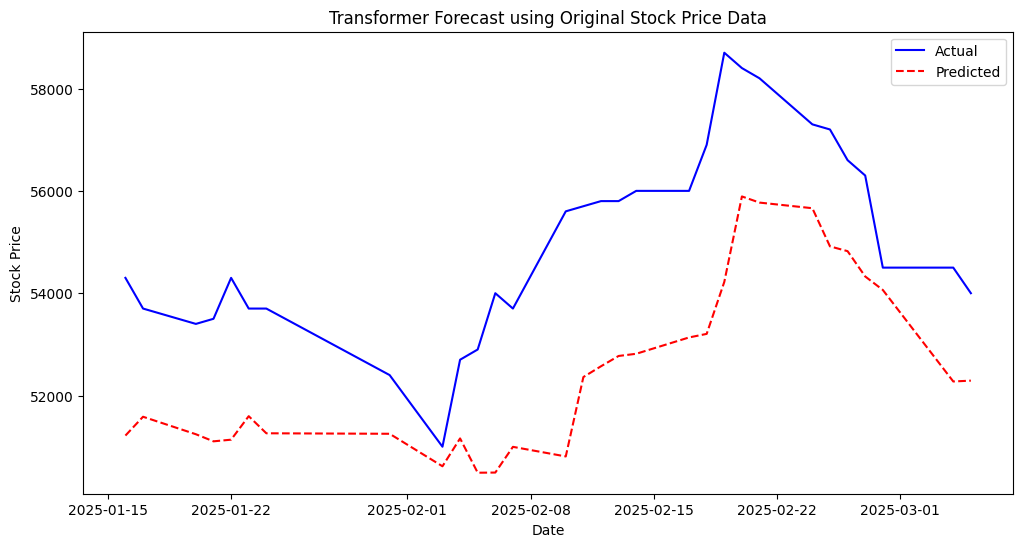

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# üîπ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÎÇ†Ïßú Ïù∏Îç±Ïä§ ÏÑ§Ï†ï
file_path = "price.csv"
df = pd.read_csv(file_path, encoding="EUC-KR")

df['ÏùºÏûê'] = pd.to_datetime(df['ÏùºÏûê'])
df.set_index('ÏùºÏûê', inplace=True)

# üîπ 'Ï¢ÖÍ∞Ä' Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (MinMaxScaler)
scaler = MinMaxScaler()
df['Ï¢ÖÍ∞Ä_scaled'] = scaler.fit_transform(df[['Ï¢ÖÍ∞Ä']])

# üîπ ÌïôÏäµ / ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (Ï†ïÌôïÌïú ÎÇ†Ïßú Í∏∞Ï§Ä)
train = df.loc[:'2024-11-29', 'Ï¢ÖÍ∞Ä_scaled']
test = df.loc['2024-11-30':, 'Ï¢ÖÍ∞Ä_scaled']

# üîπ ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Í≥ºÍ±∞ 30Ïùº Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°
X_train, y_train = create_sequences(train.values, seq_length)
X_test, y_test = create_sequences(test.values, seq_length)

# ÏûÖÎ†• Ï∞®Ïõê Î≥ÄÌôò
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# üîπ Transformer Î™®Îç∏ Íµ¨ÏÑ±
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, ffn_units, dropout_rate):
        super(TransformerBlock, self).__init__()
        self.mha = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ln1 = LayerNormalization()
        self.ln2 = LayerNormalization()
        self.ffn = tf.keras.Sequential([
            Dense(ffn_units, activation='relu'),
            Dense(d_model)
        ])
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)

    def call(self, inputs):
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.ln1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        out2 = self.ln2(out1 + ffn_output)

        return out2

# üîπ ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
d_model = 32
num_heads = 4
num_layers = 2
ffn_units = 256
dropout_rate = 0.1
learning_rate = 0.0007
batch_size = 32
epochs = 27

# üîπ Transformer Î™®Îç∏ Ï†ïÏùò
def build_transformer(seq_length, d_model, num_heads, num_layers, ffn_units, dropout_rate):
    inputs = Input(shape=(seq_length, 1))
    x = Dense(d_model)(inputs)

    for _ in range(num_layers):
        x = TransformerBlock(d_model, num_heads, ffn_units, dropout_rate)(x)

    x = Dense(1)(x[:, -1, :])  # ÎßàÏßÄÎßâ ÌÉÄÏûÑÏä§ÌÖùÏùÑ ÏòàÏ∏°
    model = Model(inputs, x)
    return model

# üîπ Î™®Îç∏ ÏÉùÏÑ± Î∞è Ïª¥ÌååÏùº
model = build_transformer(seq_length, d_model, num_heads, num_layers, ffn_units, dropout_rate)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

# üîπ ÌïôÏäµ Ïã§Ìñâ
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# üîπ ÏòàÏ∏° ÏàòÌñâ
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# üîπ ÏÑ±Îä• ÌèâÍ∞Ä (MSE, MAE)
mse = np.mean((scaler.inverse_transform(y_test.reshape(-1,1)) - predictions) ** 2)
mae = np.mean(np.abs(scaler.inverse_transform(y_test.reshape(-1,1)) - predictions))

print("üîπ MSE:", mse)
print("üîπ MAE:", mae)

# üîπ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,6))
plt.plot(test.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1,1)), label="Actual", color='blue')
plt.plot(test.index[-len(predictions):], predictions, label="Predicted", linestyle="dashed", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Transformer Forecast using Original Stock Price Data")
plt.legend()
plt.show()

## Transformer--stlÏ†ÅÏö©

Epoch 1/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 44ms/step - loss: 2.3343 - val_loss: 0.3697
Epoch 2/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - loss: 0.2207 - val_loss: 0.2259
Epoch 3/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - loss: 0.0893 - val_loss: 0.2468
Epoch 4/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 24ms/step - loss: 0.0650 - val_loss: 0.3902
Epoch 5/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 24ms/step - loss: 0.0606 - val_loss: 0.3591
Epoch 6/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - loss: 0.0561 - val_loss: 0.4463
Epoch 7/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 24ms/step - loss: 0.0514 - val_loss: 0.3627
Epoch 8/27
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 24ms/step - loss: 0.0521 - val_loss: 0.2262


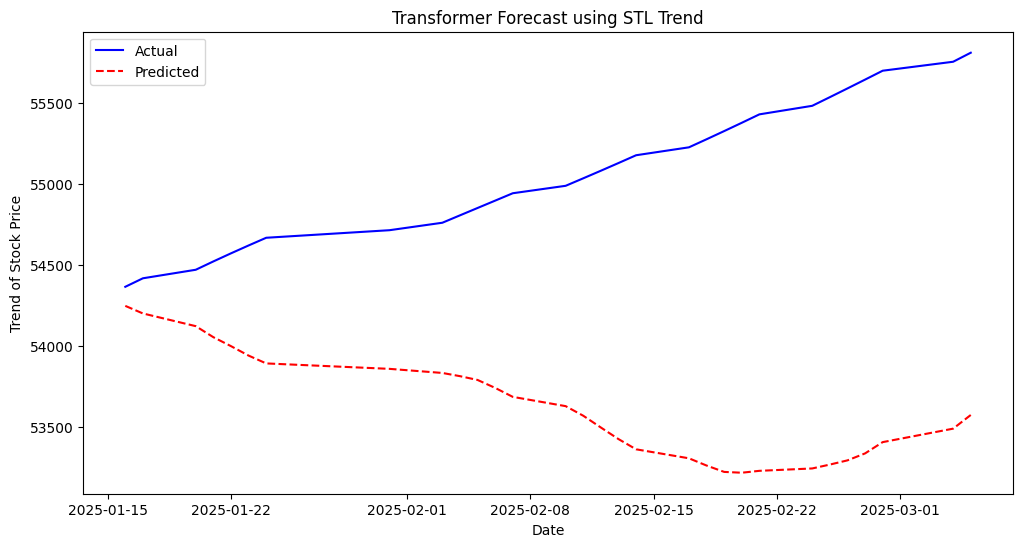

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from statsmodels.tsa.seasonal import STL
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# üîπ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÎÇ†Ïßú Ïù∏Îç±Ïä§ ÏÑ§Ï†ï
file_path = "price.csv"
df = pd.read_csv(file_path, encoding="EUC-KR")

df['ÏùºÏûê'] = pd.to_datetime(df['ÏùºÏûê'])
df.set_index('ÏùºÏûê', inplace=True)

# üîπ STLÏùÑ Ïù¥Ïö©Ìïú Ï∂îÏÑ∏(trend) Ï∂îÏ∂ú
stl = STL(df['Ï¢ÖÍ∞Ä'], period=30)
stl_result = stl.fit()
stl_trend = stl_result.trend

# üîπ ÌïôÏäµ / ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (Ï†ïÌôïÌïú ÎÇ†Ïßú Í∏∞Ï§Ä)
train_trend = stl_trend[stl_trend.index <= '2024-11-29']
test_trend = stl_trend[stl_trend.index > '2024-11-29']

# üîπ MinMaxScalerÎ°ú Ï†ïÍ∑úÌôî
scaler = MinMaxScaler()
train_trend_scaled = scaler.fit_transform(train_trend.values.reshape(-1, 1))
test_trend_scaled = scaler.transform(test_trend.values.reshape(-1, 1))

# üîπ ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Í≥ºÍ±∞ 30Ïùº Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
X_train, y_train = create_sequences(train_trend_scaled, seq_length)
X_test, y_test = create_sequences(test_trend_scaled, seq_length)

# ÏûÖÎ†• Ï∞®Ïõê Î≥ÄÌôò
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# üîπ Transformer Î™®Îç∏ Íµ¨ÏÑ±
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, ffn_units, dropout_rate):
        super(TransformerBlock, self).__init__()
        self.mha = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ln1 = LayerNormalization()
        self.ln2 = LayerNormalization()
        self.ffn = tf.keras.Sequential([
            Dense(ffn_units, activation='relu'),
            Dense(d_model)
        ])
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)

    def call(self, inputs):
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.ln1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        out2 = self.ln2(out1 + ffn_output)

        return out2

# üîπ ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
d_model = 32
num_heads = 4
num_layers = 2
ffn_units = 256
dropout_rate = 0.1
learning_rate = 0.0007
batch_size = 32
epochs = 27

# üîπ Transformer Î™®Îç∏ Ï†ïÏùò
def build_transformer(seq_length, d_model, num_heads, num_layers, ffn_units, dropout_rate):
    inputs = Input(shape=(seq_length, 1))
    x = Dense(d_model)(inputs)

    for _ in range(num_layers):
        x = TransformerBlock(d_model, num_heads, ffn_units, dropout_rate)(x)

    x = Dense(1)(x[:, -1, :])  # ÎßàÏßÄÎßâ ÌÉÄÏûÑÏä§ÌÖù ÏòàÏ∏°
    model = Model(inputs, x)
    return model

# üîπ Î™®Îç∏ ÏÉùÏÑ± Î∞è Ïª¥ÌååÏùº
model = build_transformer(seq_length, d_model, num_heads, num_layers, ffn_units, dropout_rate)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

# üîπ ÌïôÏäµ Ïã§Ìñâ
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# üîπ ÏòàÏ∏° ÏàòÌñâ
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# üîπ ÏÑ±Îä• ÌèâÍ∞Ä (MSE, MAE)
mse = np.mean((scaler.inverse_transform(y_test.reshape(-1,1)) - predictions) ** 2)
mae = np.mean(np.abs(scaler.inverse_transform(y_test.reshape(-1,1)) - predictions))

print("üîπ MSE:", mse)
print("üîπ MAE:", mae)

# üîπ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,6))
plt.plot(test_trend.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1,1)), label="Actual", color='blue')
plt.plot(test_trend.index[-len(predictions):], predictions, label="Predicted", linestyle="dashed", color='red')
plt.xlabel("Date")
plt.ylabel("Trend of Stock Price")
plt.title("Transformer Forecast using STL Trend")
plt.legend()
plt.show()
